In [2]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [4]:
df=pd.read_csv('weight-height.csv')
df.head(10)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
7,Male,68.348516
8,Male,67.018950
9,Male,63.456494


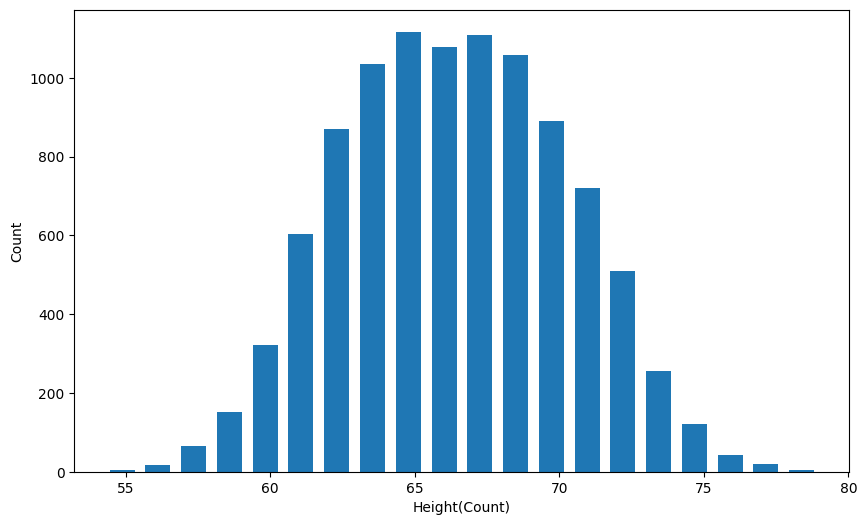

In [13]:
plt.hist(df.Height, rwidth=0.7, bins=20)
plt.xlabel("Height(Count)")
plt.ylabel("Count")
plt.show()

In [15]:
df.head(5)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [17]:
float(df.Height.min())

54.26313333

In [18]:
float(df.Height.max())

78.99874235

In [19]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


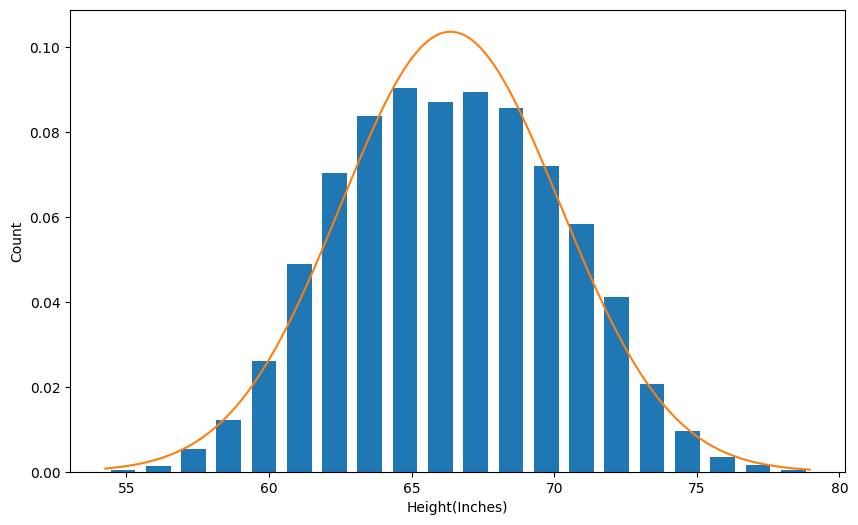

In [24]:
import numpy as np
from scipy.stats import norm
plt.hist(df.Height, bins=20, rwidth=0.7, density=True)
plt.xlabel("Height(Inches)")
plt.ylabel("Count")
rng=np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))
plt.show()

In [27]:
df.Height.std()

np.float64(3.847528120795573)

In [31]:
float(df.Height.mean())

66.367559754866

In [33]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


# Take 3 Standard Deviation

In [34]:
upper_limit=df.Height.mean()+3*df.Height.std()
float(upper_limit)

77.91014411725271

In [35]:
lower_limit=df.Height.mean()-3*df.Height.std()
float(lower_limit)

54.824975392479274

# Finding Outliers

In [38]:
df[df.Height<lower_limit]

,Gender,Height
6624,Female,54.616858
9285,Female,54.263133


In [39]:
df[df.Height>upper_limit]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [42]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [44]:
df2=df[(df.Height<upper_limit) & (df.Height>lower_limit)]

In [45]:
df2.shape

(9993, 2)

In [46]:
df2.head(10)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
7,Male,68.348516
8,Male,67.018950
9,Male,63.456494


# Outliers Detection and Removig Them

In [48]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [63]:
df["Z-score"]=(df.Height-df.Height.mean())/df.Height.std()

In [65]:
df.head()

,Gender,Height,Z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [71]:
df[df['Z-score']>3]

,Gender,Height,Z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [73]:
df[df['Z-score']<-3]

,Gender,Height,Z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [76]:
df[(df['Z-score']<-3) | (df['Z-score']>3)]

,Gender,Height,Z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [78]:
df3=df[(df['Z-score']>-3) & (df['Z-score']<3)]
df3.shape

(9993, 3)

In [79]:
df3.head(10)

,Gender,Height,Z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
5,Male,67.253016,0.230136
6,Male,68.785081,0.628331
7,Male,68.348516,0.514865
8,Male,67.018950,0.169301
9,Male,63.456494,-0.756607


# Exercise

In [100]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [110]:
df1 = pd.read_csv("bhp.csv")
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [111]:
df1.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

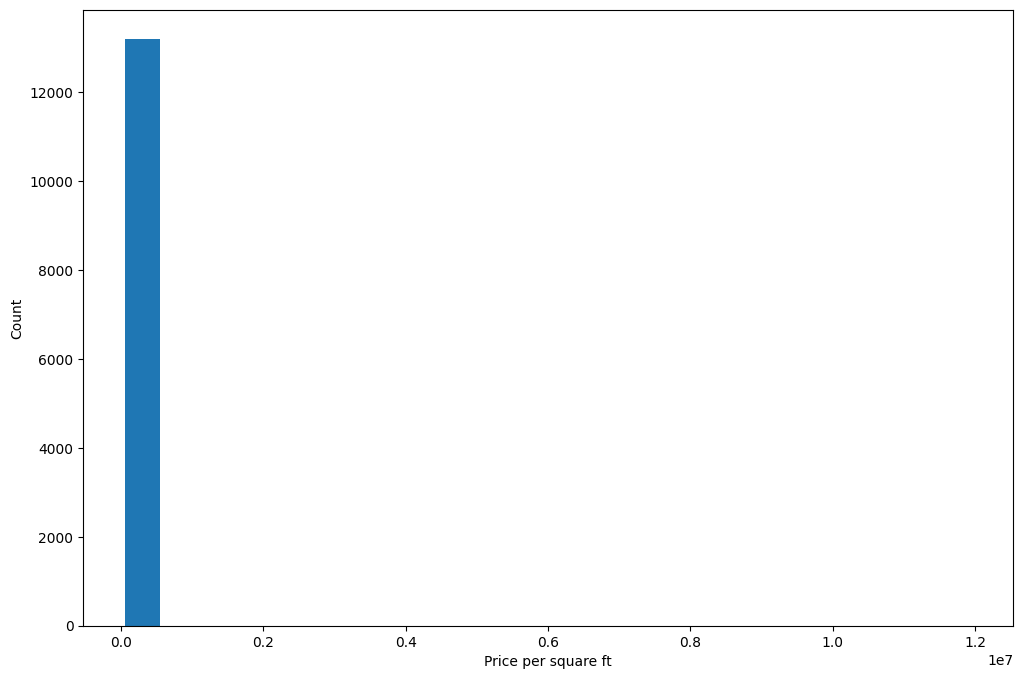

In [107]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

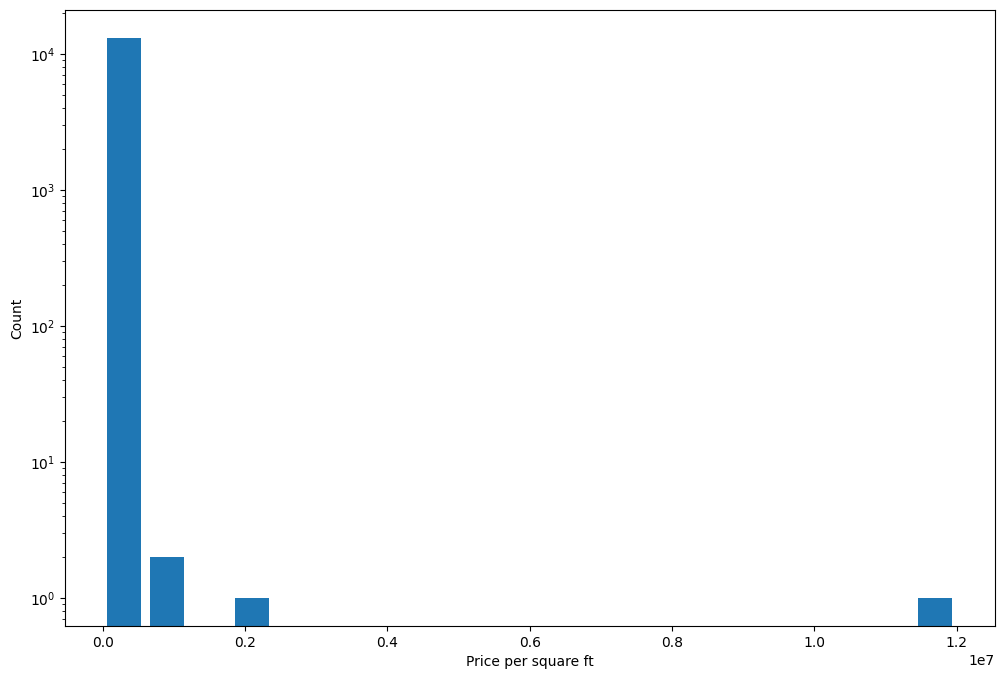

In [112]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

# (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
(1) Treat outliers using percentile first

In [84]:
lower_limit, upper_limit=df1.price.quantile([0.001, 0.999])
lower_limit, upper_limit

(11.5, 2000.0)

In [88]:
df1[df1.price<lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444
928,Attibele,1 BHK,400.0,1.0,11.00,1,2750
1452,Kengeri,1 BHK,340.0,1.0,10.00,1,2941
2408,Attibele,1 BHK,395.0,1.0,10.25,1,2594
5360,Attibele,1 BHK,400.0,1.0,10.00,1,2500
7403,other,1 BHK,470.0,2.0,10.00,1,2127
8501,Chandapura,1 BHK,450.0,1.0,9.00,1,2000
8560,Doddaballapur,2 Bedroom,640.0,1.0,10.50,2,1640
10422,Yelahanka New Town,1 BHK,284.0,1.0,8.00,1,2816
10983,Attibele,1 BHK,410.0,1.0,10.00,1,2439


In [89]:
df1[df1.price>upper_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333
598,Malleshwaram,7 BHK,12000.0,7.0,2200.0,7,18333
2592,other,4 Bedroom,30000.0,4.0,2100.0,4,7000
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
10203,other,4 Bedroom,10624.0,4.0,2340.0,4,22025
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770


In [95]:
df3=df1[(df1.price>upper_limit) |(df1.price<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.00,7,18333
598,Malleshwaram,7 BHK,12000.0,7.0,2200.00,7,18333
928,Attibele,1 BHK,400.0,1.0,11.00,1,2750
1452,Kengeri,1 BHK,340.0,1.0,10.00,1,2941
2408,Attibele,1 BHK,395.0,1.0,10.25,1,2594
2592,other,4 Bedroom,30000.0,4.0,2100.00,4,7000
3144,other,5 BHK,8321.0,5.0,2700.00,5,32448
4119,other,4 Bedroom,7000.0,5.0,2050.00,4,29285
5360,Attibele,1 BHK,400.0,1.0,10.00,1,2500


In [113]:
df4=df1[(df1.price<upper_limit) & (df1.price> lower_limit)]
df4.shape

(13169, 7)

In [114]:
df1.shape

(13200, 7)

In [119]:
df1.shape[0]-df4.shape[0]

31

In [116]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


# (2) Now remove outliers using 4 standard deviation

In [122]:
max_limit = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
min_limit = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
float(max_limit), float(min_limit)

(434828.9780548589, -418988.30457001046)

In [124]:
df1[(df1.price_per_sqft>max_limit) | (df1.price_per_sqft<min_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [125]:
df3 = df1[(df1.price_per_sqft>min_limit) & (df1.price_per_sqft<max_limit)]
df3.shape

(13196, 7)

In [126]:
df1.shape[0]-df3.shape[0]

4

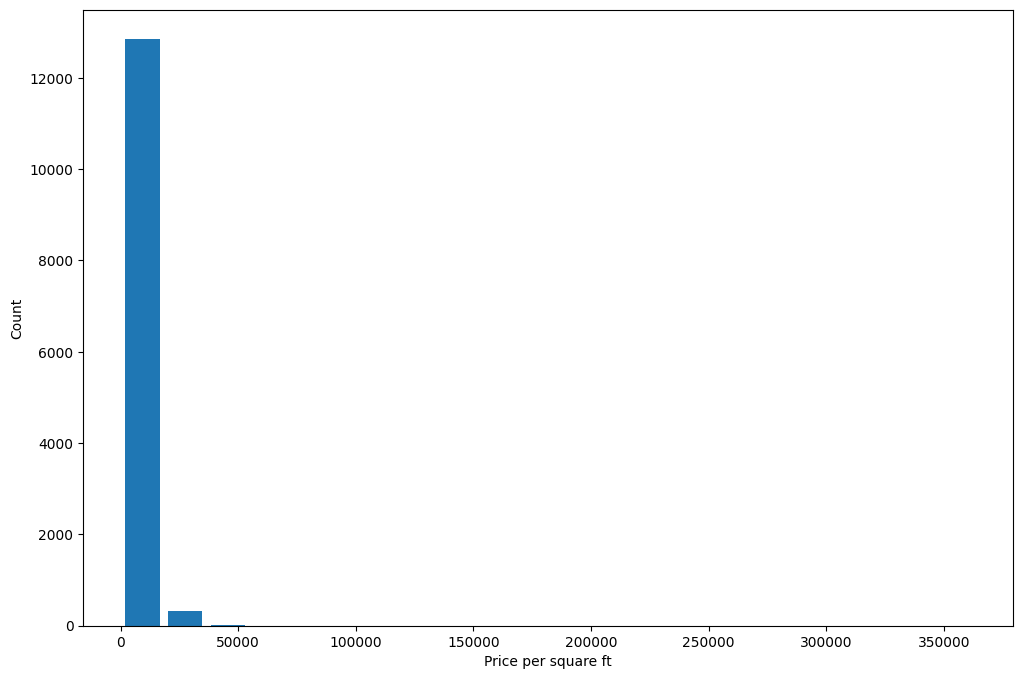

In [127]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

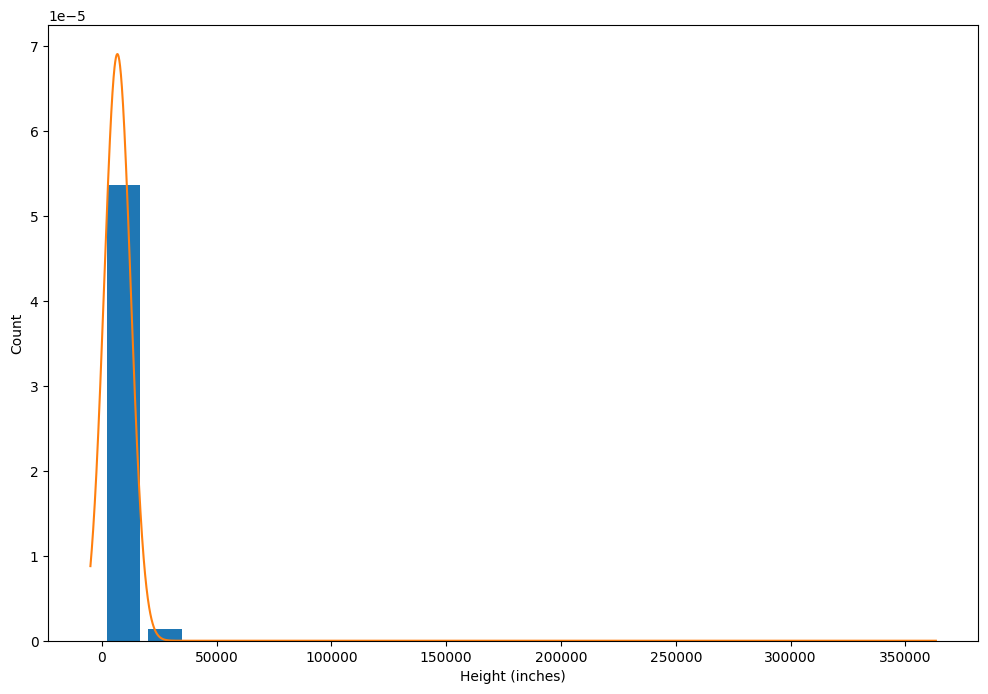

In [128]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [130]:
df1['zscore'] = (df1.price_per_sqft-df1.price_per_sqft.mean())/df1.price_per_sqft.std()
df1.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
1674,JP Nagar,4 BHK,4624.50,4.0,314.50,4,6800,-0.010497
8294,Banaswadi,1 RK,527.00,1.0,35.00,1,6641,-0.011987
1305,Electronic City,2 BHK,1070.00,2.0,56.10,2,5242,-0.025095
8074,Whitefield,2 BHK,1338.00,2.0,103.00,2,7698,-0.002083
7711,Kanakpura Road,3 BHK,1452.00,3.0,60.98,3,4199,-0.034868
443,Harlur,3 BHK,1752.12,3.0,135.00,3,7704,-0.002027
6567,Kanakpura Road,2 BHK,700.00,2.0,35.07,2,5010,-0.027269
4568,Varthur,4 Bedroom,1600.00,4.0,112.00,4,7000,-0.008623
1808,Sarjapur Road,3 BHK,1700.00,3.0,135.00,3,7941,0.000194
4216,CV Raman Nagar,3 BHK,1825.00,3.0,126.00,3,6904,-0.009523


In [132]:
outliers_z = df1[(df1.zscore < -4) | (df1.zscore>4)]
outliers_z.shape

(4, 8)

In [135]:
df4 = df1[(df1.zscore>-4)&(df1.zscore<4)]
df4.shape

(13196, 8)

In [136]:
df1.shape[0] - df4.shape[0]


4